# **Sheth L.U.J. & Sir M.V. College Of Arts, Science & Commerce**

# **Shobit Halse | T083**

# **Aim :** Logistic Regression and Decision Tree
# • Build a logistic regression model to predict a binary outcome.
# • Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
# • Construct a decision tree model and interpret the decision rules for classification.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Libraries imported 


In [ ]:
df = pd.read_csv('Apple-Quality.csv')

dataframe of dataset created


In [3]:
df = df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity','Quality']]

In [5]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# Cleaning DataSet

In [6]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df = df.dropna()

# Changing category column to numerical column

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df['Quality'] = le.fit_transform(df.Quality)

In [12]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [13]:
feature_cols = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
X = df[feature_cols]
y = df.Quality

# Doing train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the model


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Checking accuracy of testing dataset

In [16]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  81.41666666666667


# Checking accuracy of training dataset

In [17]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

1.0

# Visualizing our final decision tree

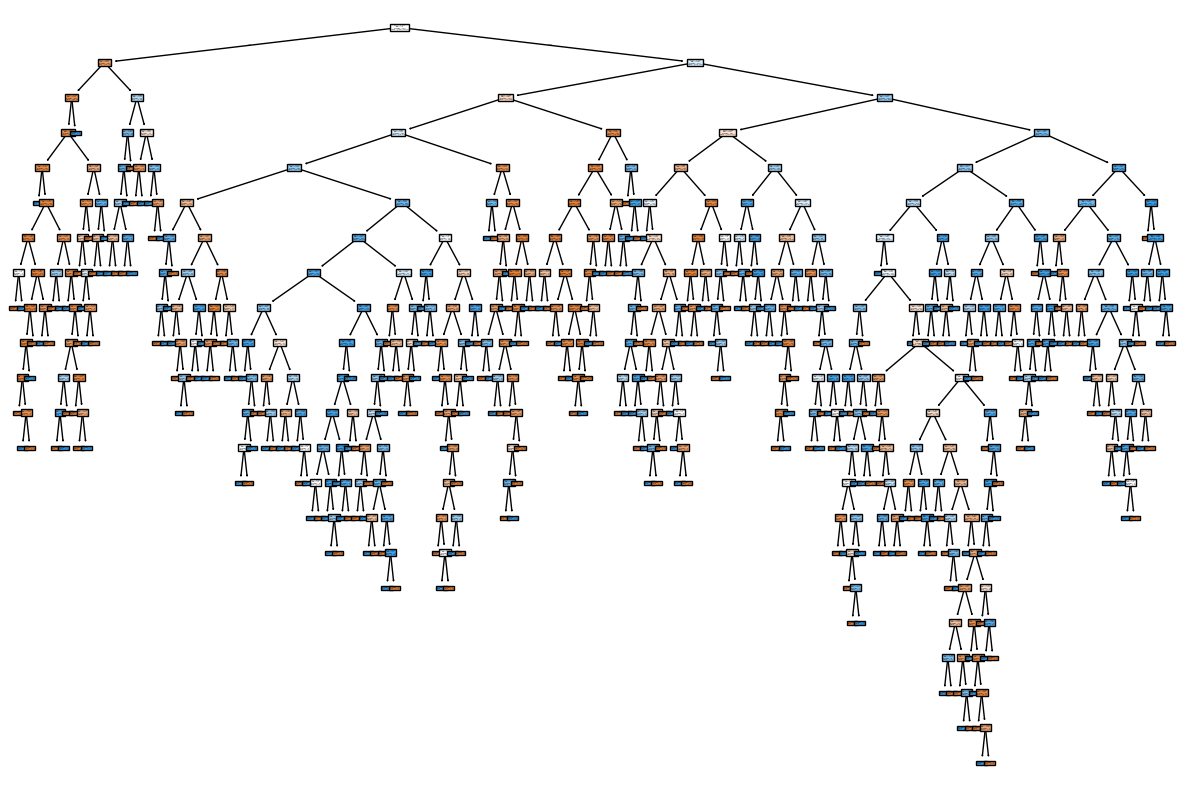

In [18]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Evaluating our test dataset

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       608
           1       0.80      0.83      0.81       592

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200

[[487 121]
 [102 490]]


# Evaluating our training dataset

In [20]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1388
           1       1.00      1.00      1.00      1412

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800

[[1388    0]
 [   0 1412]]


# Finding false positive rate and true positive rate

In [21]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)
print("FPR :",fpr_dt)
print("TPR :",tpr_dt)
print("Threshold :",thresholds_dt)


FPR : [0.         0.19901316 1.        ]
TPR : [0.        0.8277027 1.       ]
Threshold : [inf  1.  0.]


# Plotting *ROC* curve for our Decision Tree

In [22]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.8143447724039828

In [23]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

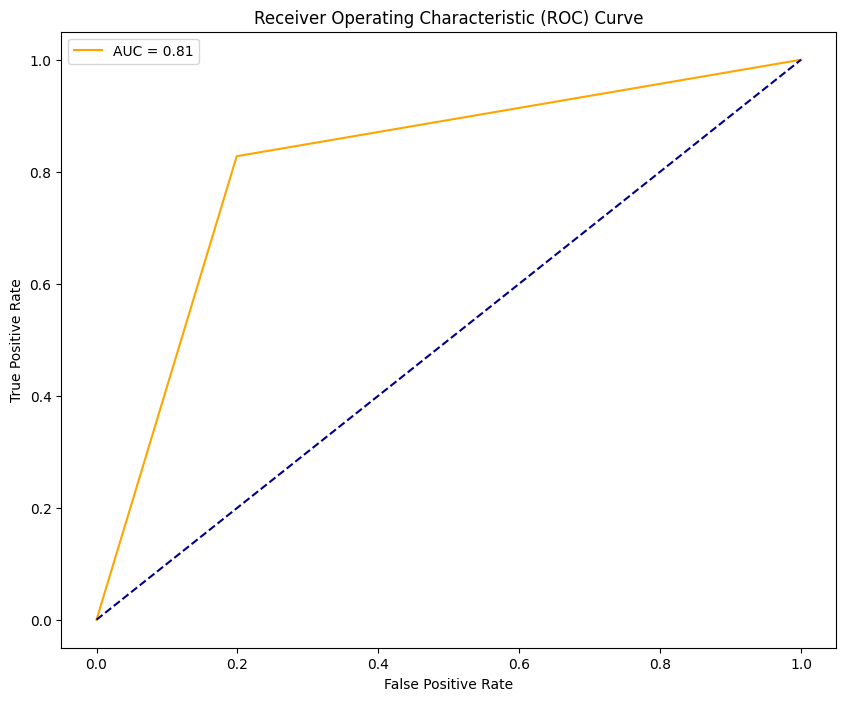

In [24]:
plot_roc_curve(fpr_dt,tpr_dt)

# Pruning of our decision tree

In [25]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

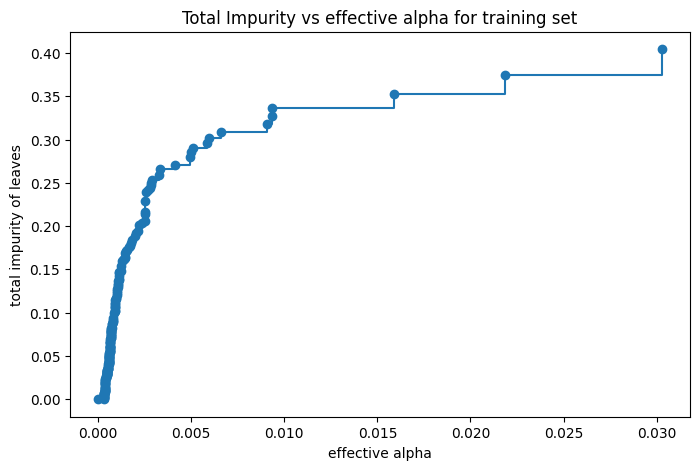

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03187541513612865


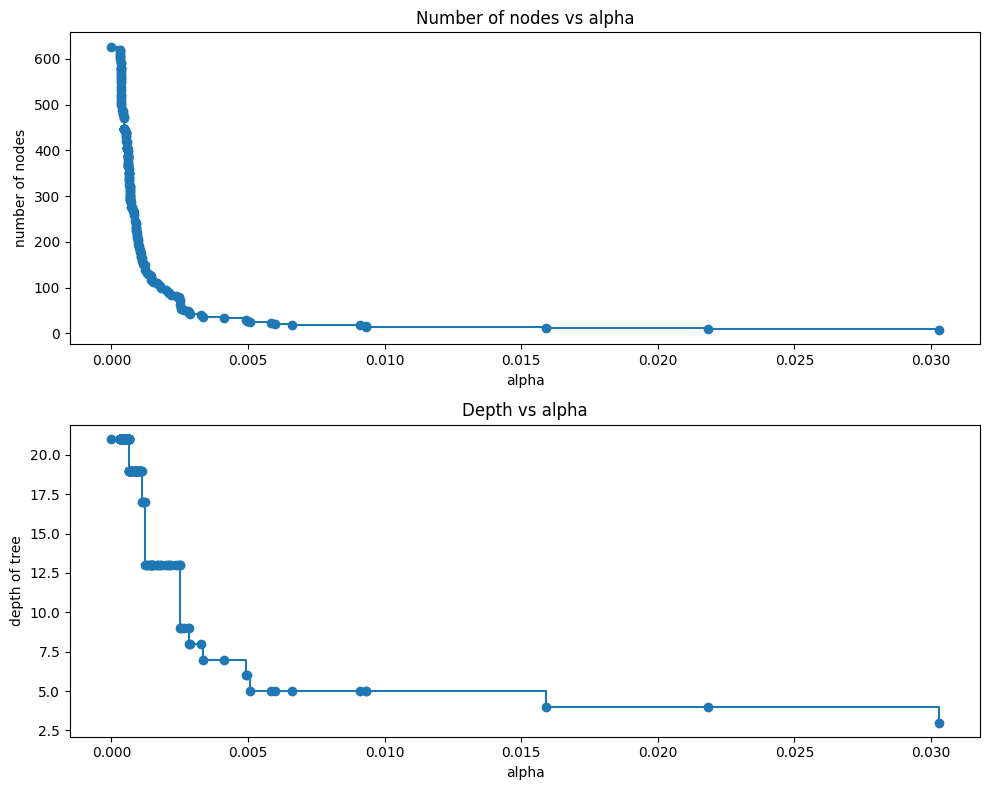

In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

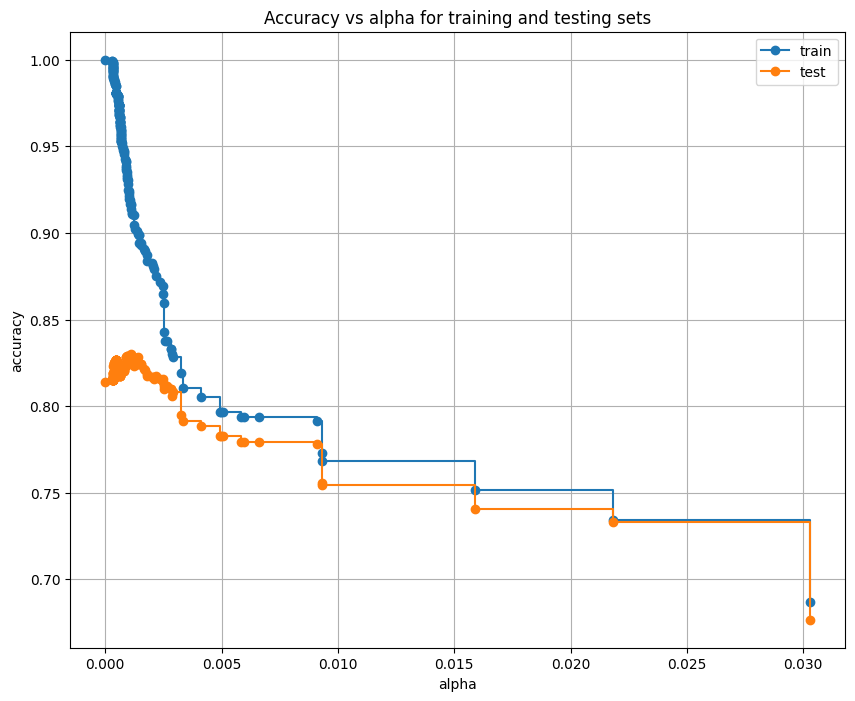

In [29]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning

In [30]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Accuracy of test dataset

In [31]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.7408333333333333

### Accuracy of training dataset

In [32]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.7514285714285714

# Visualizing after pruning

[Text(0.4444444444444444, 0.9, 'x[4] <= -1.548\ngini = 0.5\nsamples = 2800\nvalue = [1388.0, 1412.0]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.311\nsamples = 384\nvalue = [310, 74]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[0] <= -0.776\ngini = 0.494\nsamples = 2416\nvalue = [1078, 1338]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[5] <= 1.688\ngini = 0.484\nsamples = 1093\nvalue = [644, 449]'),
 Text(0.2222222222222222, 0.3, 'x[6] <= 1.654\ngini = 0.494\nsamples = 758\nvalue = [339, 419]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.433\nsamples = 581\nvalue = [184, 397]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.218\nsamples = 177\nvalue = [155, 22]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.163\nsamples = 335\nvalue = [305, 30]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= -1.729\ngini = 0.441\nsamples = 1323\nvalue = [434, 889]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.493\nsamples = 396\nvalue = [222.0, 174.0]'),
 Text(0.88

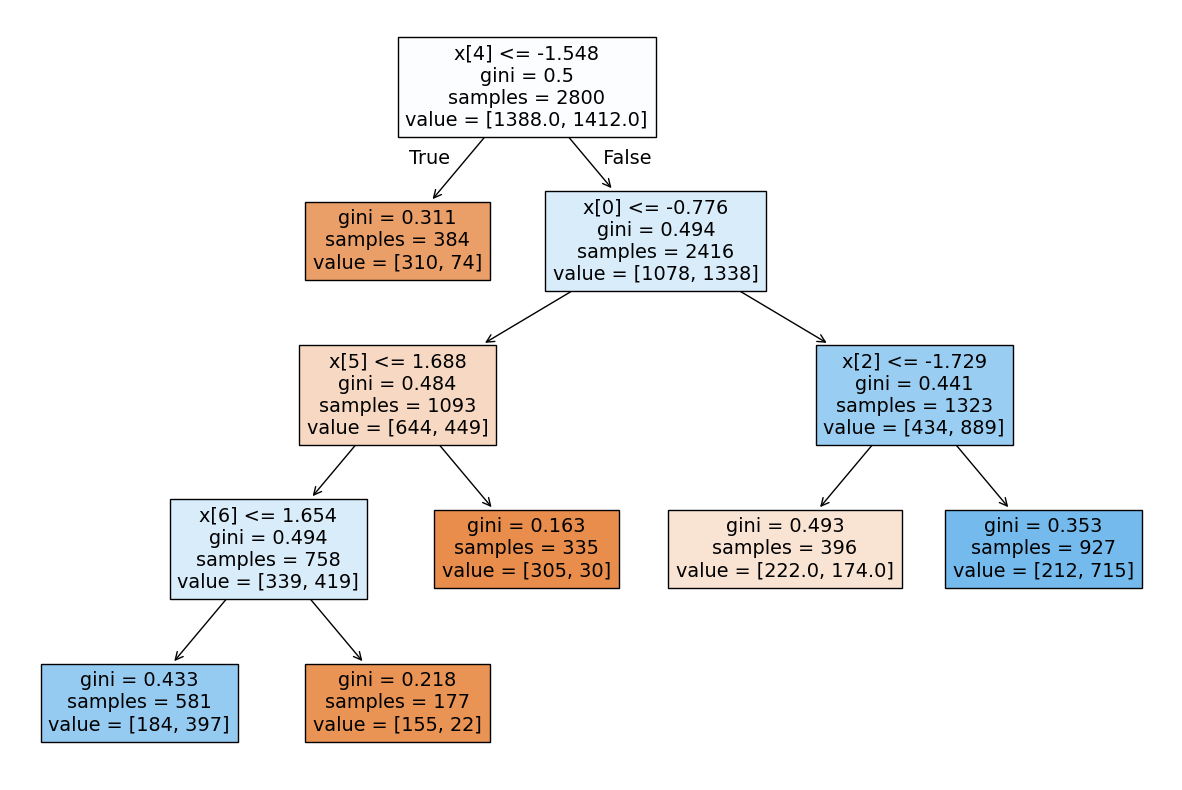

In [33]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)